<a href="https://colab.research.google.com/github/Lukem121/Simple-Stock-Prediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,284.269989
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.910004
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.799988


In [3]:
#Number of rows and columns
df.shape

(2012, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


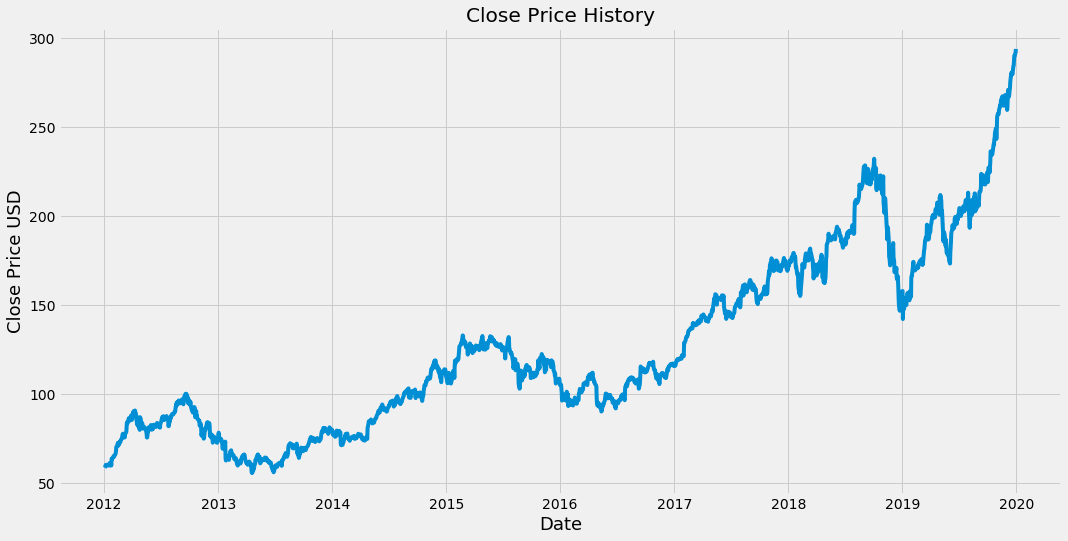

In [4]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()


In [5]:
#New dataframe only close column
data = df.filter(['Close'])

#Covert dataframe to numpy array
dataset = data.values

#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1610

In [6]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [7]:
#Making data set
train_data = scaled_data[0:training_data_len, :]

#Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
       0.02317089, 0.02235408, 0.01787967, 0.02214988, 0.01794572,
       0.0337113 , 0.03249209, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434756, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123616,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096586, 0.09287577, 0.0969778 , 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938582, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
[0.13172814323221588]



In [0]:
#Convert the x trainand y train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1550/1550 [==============================] - 117s 75ms/step - loss: 7.7224e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])